In [76]:
##!pip install tensorflow_datasets

In [77]:
####import the libraries 
import numpy as np 
import tensorflow as tf
import tensorflow_datasets as tfds

##### Read the DataSet :imdb reviews

In [78]:
imdb,info  =  tfds.load("imdb_reviews",with_info=True,as_supervised=True)

In [79]:
train_data ,test_data =  imdb['train'],imdb['test']

In [80]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [81]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [82]:
##converted data into ready formate 
training_sentence  =  []
training_labels = []
test_sentence = []
test_labels = []
for s,l in train_data:
  training_sentence.append(str(s.numpy()))
  training_labels.append(l.numpy())
for s,l in test_data:
  test_sentence.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [83]:
training_labels

[0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [84]:
training_sentence[3]

"b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'"

In [85]:
training_labels[3]

1

In [86]:
training_labels_final =  np.array(training_labels)
testing_labels_final =  np.array(test_labels)


In [87]:
len(training_sentence),len(test_sentence)

(25000, 25000)

In [88]:
len(training_labels_final),len(testing_labels_final)

(25000, 25000)

In [89]:
vocab_size  = 10000
embedding_dim  = 16
max_length = 120 
trunc_type ='post'

In [90]:
# pip install keras

In [91]:
# !pip install keras_preprocessing


In [92]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [93]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer =  Tokenizer(num_words =vocab_size)
tokenizer.fit_on_texts(training_sentence)
word_index =  tokenizer.word_index
word_index;
len(word_index) 

86538

In [94]:
word_index;
sequences =  tokenizer.texts_to_sequences(training_sentence)
padded =  pad_sequences(sequences,maxlen =  max_length,truncating  =  trunc_type)
testing_sequnce =  tokenizer.texts_to_sequences(test_sentence)
testing_padded   =  pad_sequences(testing_sequnce,maxlen= max_length)

In [95]:
len(sequences),len(sequences[0])


(25000, 110)

In [96]:
len(padded[0])

120

In [97]:
padded.shape

(25000, 120)

In [98]:
testing_padded.shape

(25000, 120)

In [99]:
padded.dtype

dtype('int32')

###bulinng the simpleRNN

In [100]:
#importing
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Embedding


In [101]:
model_rnn =  Sequential([
    Embedding(vocab_size,embedding_dim,
              input_length = max_length),
    SimpleRNN(32),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
model_rnn.summary()

c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [102]:
###Compile the RNN model 

In [103]:
#### Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [104]:
history  =  model_rnn.fit(padded,training_labels_final,epochs=10,validation_data= (testing_padded,testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 37ms/step - accuracy: 0.5059 - loss: 0.6954 - val_accuracy: 0.5033 - val_loss: 0.6931
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5696 - loss: 0.6781 - val_accuracy: 0.5858 - val_loss: 0.6632
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7518 - loss: 0.5180 - val_accuracy: 0.6404 - val_loss: 0.6871
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8955 - loss: 0.2616 - val_accuracy: 0.7266 - val_loss: 0.6783
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.9654 - loss: 0.1061 - val_accuracy: 0.6994 - val_loss: 0.9642
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9822 - loss: 0.0546 - val_accuracy: 0.7178 - val_loss: 1.0515
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.9905 - loss: 0.0312 - val_accuracy: 0.7056 - val_loss: 1.3418
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.9958 - loss: 0.0134 - 

In [105]:
#history.history['accuracy']

In [106]:
import matplotlib.pyplot as plt


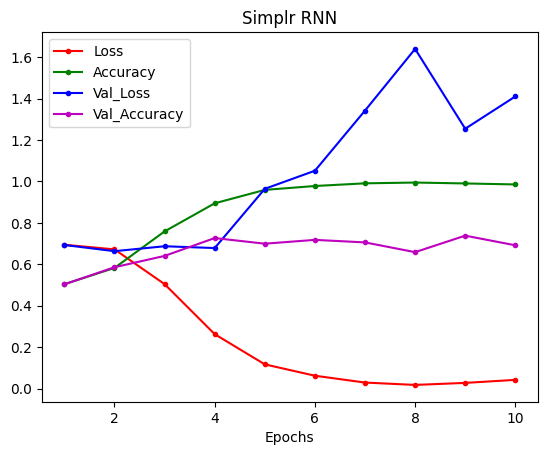

In [107]:
plt.title('Simplr RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

### Build the model

In [108]:
from keras.layers import Bidirectional, GRU,  LSTM

In [109]:

model_lstm =  Sequential([
    Embedding(vocab_size,embedding_dim,input_length = max_length),
    Bidirectional(LSTM(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_lstm.summary()

c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Complile LSTM model

In [110]:
#### Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [111]:
### Train LSTM Model

In [112]:
history_lstm  =  model_lstm.fit(padded,training_labels_final,epochs=10,validation_data= (testing_padded,testing_labels_final))

Epoch 1/10


782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.6496 - loss: 0.5880 - val_accuracy: 0.8471 - val_loss: 0.3524
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.8836 - loss: 0.2963 - val_accuracy: 0.8457 - val_loss: 0.3572
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.9151 - loss: 0.2298 - val_accuracy: 0.8432 - val_loss: 0.3939
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.9321 - loss: 0.1839 - val_accuracy: 0.8361 - val_loss: 0.4114
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 81ms/step - accuracy: 0.9467 - loss: 0.1517 - val_accuracy: 0.8153 - val_loss: 0.6627
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.9579 - loss: 0.1181 - val_accuracy: 0.8161 - val_loss: 0.6734
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step - accuracy: 0.9660 - loss: 0.0972 - val_accuracy: 0.8251 - val_loss: 0.5513
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 80ms/step - accuracy: 0.9734 - loss: 0.0805 - val_accurac

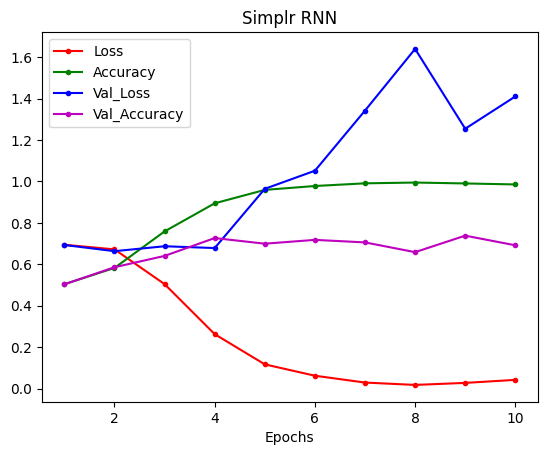

In [113]:
plt.title('Simplr RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

### Moel for GRU

In [114]:

model_gru =  Sequential([
    Embedding(vocab_size,embedding_dim,
              input_length = max_length),
    Bidirectional(GRU(32)),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])

model_gru.summary()

c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
#### Compile the model
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [116]:
### Training GRU model

In [117]:
history_gru  =  model_gru.fit(padded,training_labels_final,epochs=10,validation_data= (testing_padded,testing_labels_final))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 92ms/step - accuracy: 0.6368 - loss: 0.5949 - val_accuracy: 0.8459 - val_loss: 0.3539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.8844 - loss: 0.2881 - val_accuracy: 0.8480 - val_loss: 0.3488
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.9207 - loss: 0.2135 - val_accuracy: 0.8359 - val_loss: 0.4186
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9418 - loss: 0.1609 - val_accuracy: 0.8330 - val_loss: 0.4280
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.9647 - loss: 0.1044 - val_accuracy: 0.8306 - val_loss: 0.5455
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.9784 - loss: 0.0702 - val_accuracy: 0.8207 - val_loss: 0.6525
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.9834 - loss: 0.0527 - val_accuracy: 0.8208 - val_loss: 0.8806
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.9886 - loss: 0.0363 - 

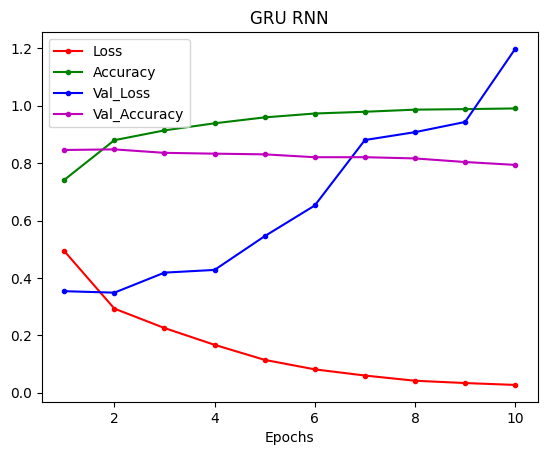

In [121]:
plt.title('GRU RNN')
plt.xlabel('Epochs')
plt.plot(range(1,11), history_gru.history['loss'], color='r', label = 'Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='m', label = 'Val_Accuracy', marker = '.')
plt.legend(loc= 'upper left')

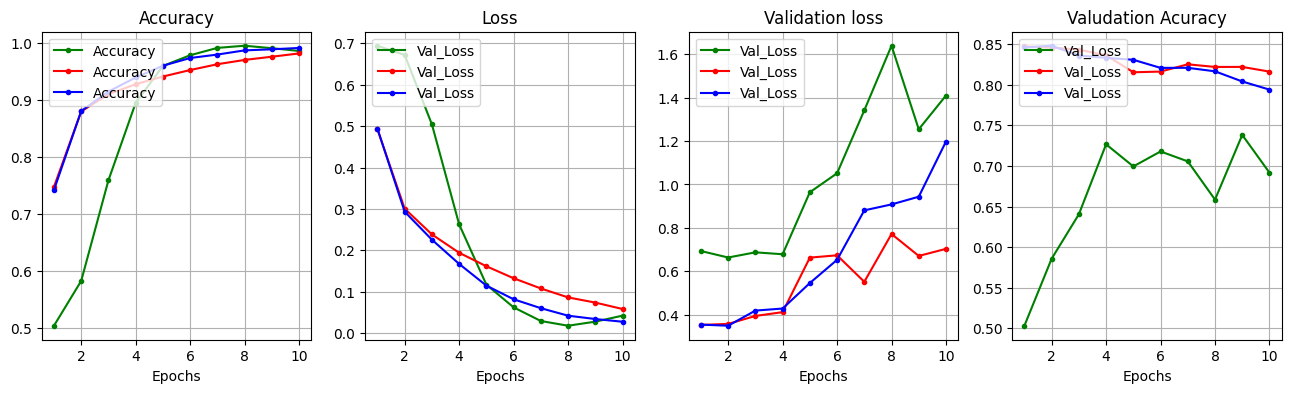

In [133]:
### all plot
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['accuracy'], color='g', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='r', label = 'Accuracy', marker = '.')
plt.plot(range(1,11), history_gru.history['accuracy'], color='b', label = 'Accuracy', marker = '.')
plt.grid()
plt.legend(loc= 'upper left')


plt.subplot(1,4,2)
plt.title('Loss')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['loss'], color='g', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['loss'], color='b', label = 'Val_Loss', marker = '.')
plt.grid()
plt.legend(loc= 'upper left')

plt.subplot(1,4,3)
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['val_loss'], color='g', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='r', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['val_loss'], color='b', label = 'Val_Loss', marker = '.')
plt.grid()
plt.legend(loc= 'upper left')

plt.subplot(1,4,4)
plt.title('Valudation Acuracy')
plt.xlabel('Epochs')
plt.plot(range(1,11), history.history['val_accuracy'], color='g', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='r', label = 'Val_Loss', marker = '.')
plt.plot(range(1,11), history_gru.history['val_accuracy'], color='b', label = 'Val_Loss', marker = '.')
plt.legend(loc= 'upper left')
plt.grid()

In [123]:
new1 = 'This was wrost movie. Please do not watch it. Waste of mpone and time.'

new2 = 'A must watch movie. I loved to watch it. It was just amazing.'

In [124]:
def predict(model, text):
    sequences =  tokenizer.texts_to_sequences(text)
    padded =  pad_sequences(sequences,maxlen =  max_length,truncating  =  trunc_type)
    result = model.predict(padded, verbose=False)
    percentage_pos = result[0,0]
    if round(percentage_pos) == 0:
        return (1-percentage_pos), 'NEGATIVE'
    else:
        return (percentage_pos, 'POSITIVE')



In [125]:
predict(model_rnn, new1), predict(model_rnn, new2)

((0.96685606, 'POSITIVE'), (0.82277864, 'POSITIVE'))

In [126]:
predict(model_lstm, new1), predict(model_lstm, new2)

((0.63921255, 'POSITIVE'), (0.5084467828273773, 'NEGATIVE'))

In [127]:
predict(model_gru, new1), predict(model_gru, new2)

((0.7471093, 'POSITIVE'), (0.5672153234481812, 'NEGATIVE'))